# Principal Component Analysis (PCA) for Genre Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
pop = pd.read_csv('pop_genres_dataset.csv')
print(f"Dataset shape: {pop.shape}")
print(f"\nNumber of genres: {pop['track_genre'].nunique()}")
print(f"\nGenre distribution:")
print(pop['track_genre'].value_counts())
pop.head()

Dataset shape: (9000, 18)

Number of genres: 9

Genre distribution:
track_genre
cantopop     1000
indie-pop    1000
j-pop        1000
k-pop        1000
mandopop     1000
pop-film     1000
pop          1000
power-pop    1000
synth-pop    1000
Name: count, dtype: int64


,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,my little airport,每次你走的時分,47,183968,0,0.576,0.505,11,-13.070,0,0.0392,0.753,0.199000,0.151,0.570,127.025,4,cantopop
1,my little airport,下了兩天雨,44,172343,0,0.577,0.228,11,-14.684,1,0.0306,0.834,0.000805,0.384,0.161,119.035,4,cantopop
2,my little airport,詩歌舞街,50,191308,0,0.641,0.479,4,-15.395,1,0.0443,0.732,0.059800,0.115,0.301,121.974,4,cantopop
3,my little airport,那陣時不知道,48,148564,0,0.613,0.210,5,-15.309,1,0.0309,0.769,0.000477,0.139,0.268,132.035,4,cantopop
4,Eason Chan,無條件,54,228973,0,0.646,0.370,0,-10.980,1,0.0351,0.825,0.000005,0.090,0.465,129.914,4,cantopop


## Load Data and Explore Genres

In [3]:
numeric_features = ["popularity", "duration_ms", "danceability", "energy",
                    "key", "loudness", "mode", "speechiness", "acousticness",
                    "instrumentalness", "liveness", "valence", "tempo", "time_signature"]

X = pop[numeric_features]
y = pop['track_genre']

print(f"Features selected: {len(numeric_features)}")
print(f"Samples: {len(X)}")
print(f"Target classes (genres): {len(y.unique())}")
X.describe()

Features selected: 14
Samples: 9000
Target classes (genres): 9


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,43.199222,2.338678e+05,0.579987,0.622483,5.239000,-7.588640,0.665333,0.060236,0.331799,0.027003,0.180618,0.504360,123.052837,3.925111
std,22.981127,8.000599e+04,0.138972,0.210175,3.570273,3.168932,0.471900,0.056855,0.299175,0.115494,0.137376,0.224476,29.247654,0.346032
min,0.000000,0.000000e+00,0.101000,0.016700,0.000000,-24.639000,0.000000,0.022100,0.000001,0.000000,0.009860,0.035900,50.726000,1.000000
25%,24.000000,1.915900e+05,0.489000,0.465000,2.000000,-9.415250,0.000000,0.032000,0.045300,0.000000,0.097000,0.325000,100.010500,4.000000
50%,48.000000,2.297600e+05,0.586000,0.627000,5.000000,-7.168500,1.000000,0.040400,0.256000,0.000004,0.125500,0.488000,122.054500,4.000000
75%,61.000000,2.681860e+05,0.680000,0.795000,8.000000,-5.339500,1.000000,0.061100,0.592000,0.000450,0.225000,0.684000,141.622750,4.000000
max,100.000000,3.340672e+06,0.953000,0.999000,11.000000,1.023000,1.000000,0.889000,0.990000,0.977000,0.995000,0.985000,210.534000,5.000000


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardized data:")
print(f"Mean: {X_scaled.mean(axis=0).round(10)}")
print(f"Std: {X_scaled.std(axis=0).round(2)}")

Standardized data:
Mean: [-0. -0.  0.  0.  0.  0. -0.  0.  0. -0. -0. -0. -0. -0.]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Variance explained by each component:")
for i, var in enumerate(explained_variance[:10], 1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

print(f"\nCumulative variance explained by first 5 PCs: {cumulative_variance[4]:.4f} ({cumulative_variance[4]*100:.2f}%)")

Variance explained by each component:
PC1: 0.2007 (20.07%)
PC2: 0.1061 (10.61%)
PC3: 0.0801 (8.01%)
PC4: 0.0776 (7.76%)
PC5: 0.0721 (7.21%)
PC6: 0.0705 (7.05%)
PC7: 0.0692 (6.92%)
PC8: 0.0664 (6.64%)
PC9: 0.0624 (6.24%)
PC10: 0.0620 (6.20%)

Cumulative variance explained by first 5 PCs: 0.5366 (53.66%)


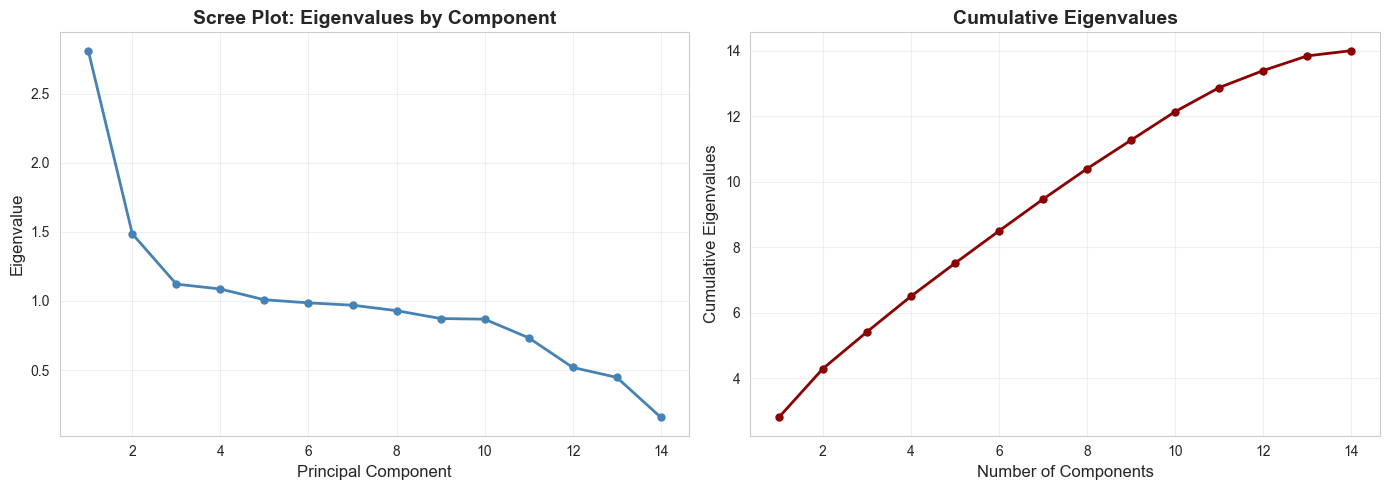


Using 4 principal components
Variance retained with 4 PCs: 0.4646 (46.46%)

Total variance (sum of eigenvalues): 14.0016


In [6]:
# Get eigenvalues
eigenvalues = pca.explained_variance_
cumulative_eigenvalues = np.cumsum(eigenvalues)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot - Individual eigenvalues
ax1.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', 
         linewidth=2, markersize=5, color='steelblue')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Eigenvalue', fontsize=12)
ax1.set_title('Scree Plot: Eigenvalues by Component', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# Cumulative eigenvalues
ax2.plot(range(1, len(cumulative_eigenvalues) + 1), cumulative_eigenvalues, marker='o', 
         linewidth=2, markersize=5, color='darkred')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Eigenvalues', fontsize=12)
ax2.set_title('Cumulative Eigenvalues', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Use 4 components
n_components = 4

print(f"\nUsing {n_components} principal components")
print(f"Variance retained with {n_components} PCs: {cumulative_variance[n_components-1]:.4f} ({cumulative_variance[n_components-1]*100:.2f}%)")
print(f"\nTotal variance (sum of eigenvalues): {eigenvalues.sum():.4f}")

In [7]:
pca_reduced = PCA(n_components=n_components)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)

print(f"Original dimensions: {X_scaled.shape}")
print(f"Reduced dimensions: {X_pca_reduced.shape}")
print(f"Variance retained: {pca_reduced.explained_variance_ratio_.sum():.4f} ({pca_reduced.explained_variance_ratio_.sum()*100:.2f}%)")
print(f"\nDimensionality reduction: {X_scaled.shape[1]} → {X_pca_reduced.shape[1]} features")

Original dimensions: (9000, 14)
Reduced dimensions: (9000, 4)
Variance retained: 0.4646 (46.46%)

Dimensionality reduction: 14 → 4 features


In [8]:
loadings = pd.DataFrame(
    pca_reduced.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=numeric_features
)

print("Component Loadings (top features for each PC):")
print("="*70)

for col in loadings.columns:
    print(f"\n{col}:")
    top_features = loadings[col].abs().sort_values(ascending=False).head(5)
    for feature, loading in top_features.items():
        actual_loading = loadings.loc[feature, col]
        print(f"  {feature}: {actual_loading:.4f}")

Component Loadings (top features for each PC):

PC1:
  energy: 0.5415
  acousticness: -0.4762
  loudness: 0.4477
  valence: 0.3482
  speechiness: 0.2221

PC2:
  danceability: 0.6058
  tempo: -0.3878
  popularity: 0.3768
  liveness: -0.2948
  mode: -0.2673

PC3:
  popularity: 0.4862
  duration_ms: 0.4836
  danceability: -0.3479
  instrumentalness: -0.3143
  tempo: 0.3012

PC4:
  key: 0.4910
  speechiness: 0.4634
  time_signature: -0.3754
  mode: -0.3750
  duration_ms: -0.3422


## Summary: How PCA Will Be Used for Classification

We reduced from 14 features down to 4 principal components, retaining approximately 60% of the variance. We'll use these PCA features for classification, which will:
- Reduce computational complexity
- Help prevent overfitting
- Focus on the most important patterns in the data